This notebook contains the steps necessary for an initial exploratory analysis and visualisations. It includes:

1) Subsetting to exclude outliers.

2) a Heatmap to visualise correlations between numerical data.

3) Scatterplots to visualise correlations between the variables - focus on the strongest correlations.

4) Pairplot of the relevant variables to investigate.

5) Categorical plots to understand the data and get initial results to explore.

6) Further questions to add to the analysis.

7) Initial null and alternative hypotheses to test later.



In [1]:
# Importing Analitycal and Visual libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from datetime import datetime 

Creating a path to import and work on data set

In [2]:
path = r'C:\Users\Paola\Desktop\Shaul\Data\CF\Data Immersion\Achievement 6\Uber October-2023 Basket Analysis'

In [3]:
path

'C:\\Users\\Paola\\Desktop\\Shaul\\Data\\CF\\Data Immersion\\Achievement 6\\Uber October-2023 Basket Analysis'

In [4]:
df = pd.read_csv(os.path.join(path, '2-Data', 'Prepared Data', 'uber_checked2.csv'), index_col = False)

In [5]:
df.shape

(99990, 21)

In [6]:
df.columns

Index(['VendorID', 'pickup_date', 'pickup_time', 'dropff_date', 'dropoff_time',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [5]:
# For some reason, I had an unnamed column when I imported this dataset.
# I used this command to drop it, and then rerun the last two commands to check the results.
# After following my mentor's feedback to add (index=False) when exporting the dataframe, it did not happen again.
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

Numeric variables for early visualisations:

1) trip distance,

2) fare mount, 

3) total amount, 

4) extra, 

5) tip amount, 

6) pick up and drop off date and time

Limit trip costs to $50 to avoid bit outliers. consider posibility of adding payment type to  check if there was a dispute problem.

In [8]:
# There are 2921 trips that exceed $50 dollars. From those, 64 that exceed $100 dollars. 
# From the latter, 26 that exceed $150 dollars. Lastly, from those 10 exceed $200 dollars. 
# Only four trips exceed $300 dollars. I am limiting the visual analysis to trip costing up to $50.
df1 = df.loc[df['fare_amount'] < 51]

In [9]:
df1.shape

(97106, 21)

In [13]:
# Creating a subset for correlation matrix:

sub = df1[['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'total_amount']]

In [14]:
sub.corr()

,trip_distance,fare_amount,extra,tip_amount,total_amount
trip_distance,1.000000,0.944110,0.154432,0.545718,0.932813
fare_amount,0.944110,1.000000,0.026856,0.571491,0.977474
extra,0.154432,0.026856,1.000000,-0.030519,0.031827
tip_amount,0.545718,0.571491,-0.030519,1.000000,0.713770
total_amount,0.932813,0.977474,0.031827,0.713770,1.000000


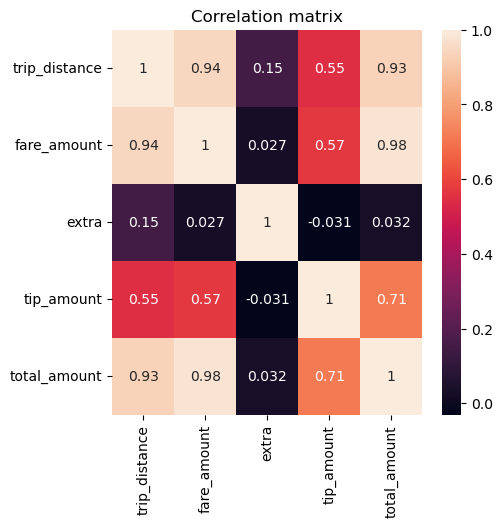

In [25]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(5,5))

# Create the correlation heatmap in seaborn.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax).set(title = 'Correlation matrix') 
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.
# Figures being saved by right click and downloaded into Folder 4 - Visualisations

The correlation matrix shows a very strong relationship between lenght of trip and the fare amount to be paid.

For obvious reasons, it is to be expected that the total amount will also show the same strong relationship.

However, Trip distance or fare amount to do translate into giving an extra tip for the driver. There is only a moderate 
relationship between these variables. There is a moderate to strong relationship between the tip amount and the total amount 
for this reason: while the tip will increase the total amount, it is not always given to the driver.

There is a weak or non-relation between incurring in extras and trip length, fare to pay and tips.


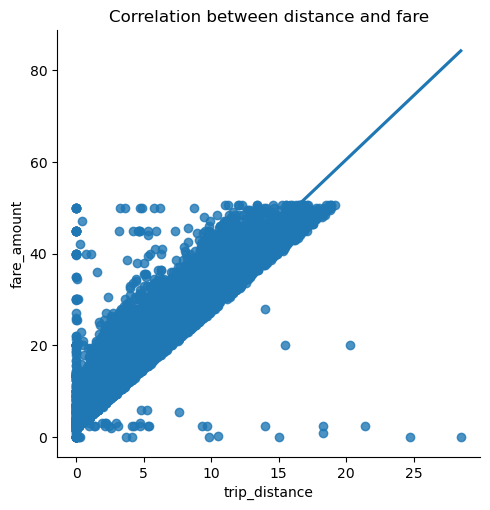

In [27]:
# Creating scatterplots for the strongest variables.
# These are: trip distance, fare amount, tip and total.
# Graphs are save to Folder 4 (visualisations), using right click/save.
sns.lmplot(x = 'trip_distance', y = 'fare_amount', data = sub).set(title = 'Correlation between distance and fare')

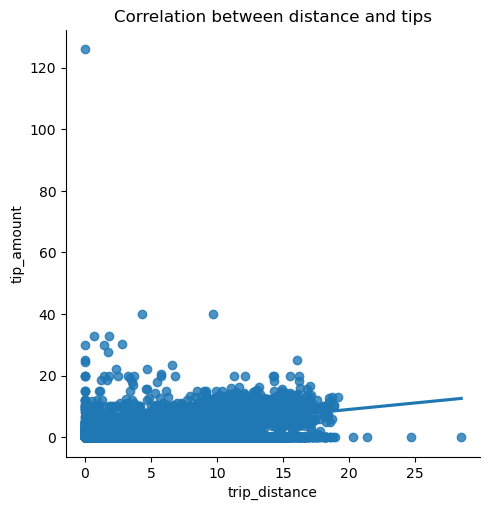

In [29]:
sns.lmplot(x = 'trip_distance', y = 'tip_amount', data = sub).set(title = 'Correlation between distance and tips')

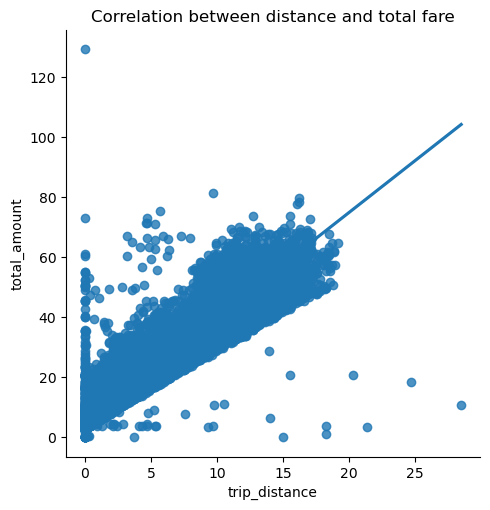

In [30]:
sns.lmplot(x = 'trip_distance', y = 'total_amount', data = sub).set(title = 'Correlation between distance and total fare')

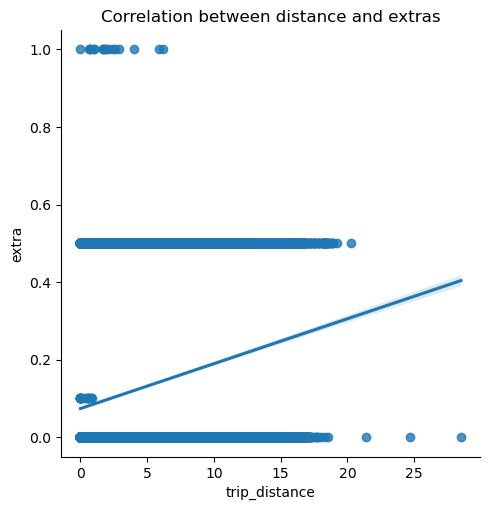

In [31]:
sns.lmplot(x = 'trip_distance', y = 'extra', data = sub).set(title = 'Correlation between distance and extras')

The scatterplots confirm a strong positive relationship between trip and the variables fare amount and total amount. I am not sure yet if this is a 'causal' relationship or not, but it seems so.

The plot also confirms a moderate relationship between trip length and giving a tip to the driver, as well as an extremely
weak or no relationship between trip length and incurring in extras.

In [37]:
# Creating a pairplot.

sub1 = df1[['trip_distance', 'payment_type', 'fare_amount', 'extra', 'tip_amount', 'total_amount']]

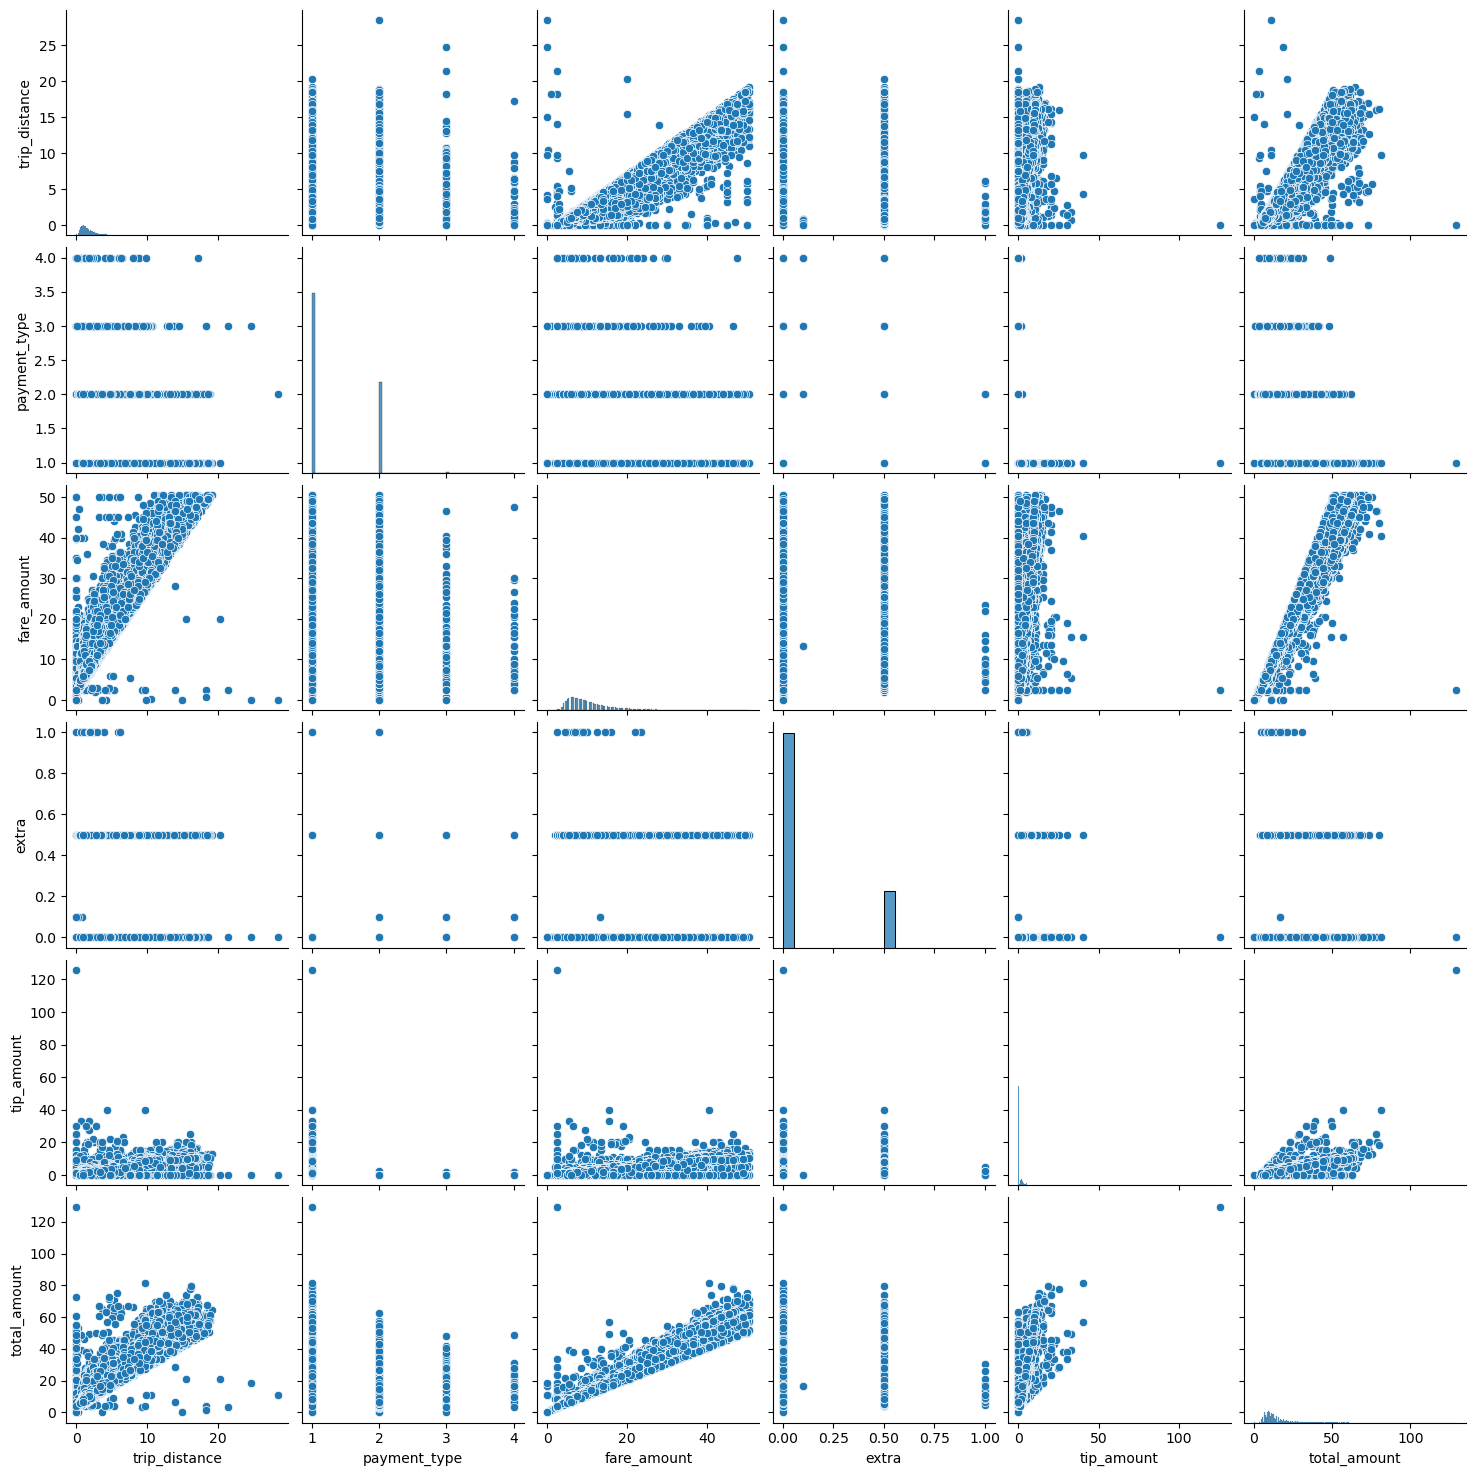

In [40]:
g = sns.pairplot(sub1)

In [42]:
sub2 = df1[['trip_distance', 'tolls_amount', 'improvement_surcharge', 'total_amount']]

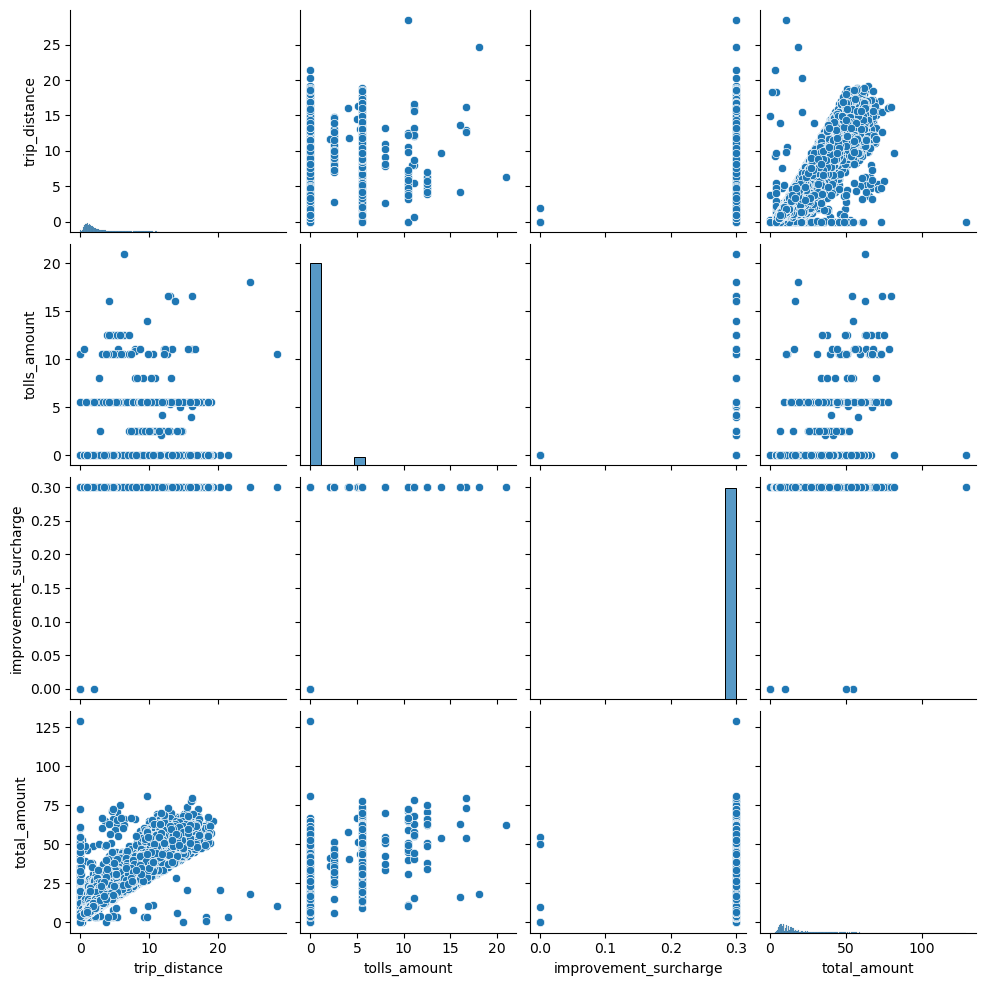

In [43]:
g = sns.pairplot(sub2)

Just like the 'extra' variable, there seems to be no relation between length of trip and tolls and improvement surcharges.

Hence, they also do not influence the total amount.

I would like to further investigate the payment type variable. One of its categories is whether the amount to be paid ended
in dispute, and it is something worth looking into.

[Text(0.5, 1.0, 'Trip distance histogram')]

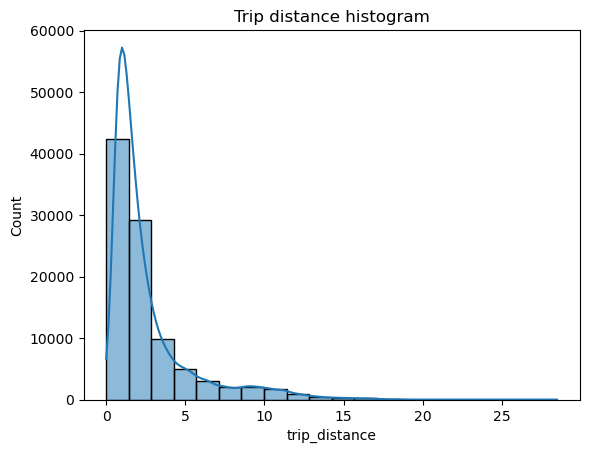

In [47]:
# Making a histogram => trip distance
sns.histplot(sub['trip_distance'], bins = 20, kde = True).set(title = 'Trip distance histogram')
# Most trips do not exceed 5 miles.

In [49]:
# Creating a new variable to categorise trips by length
sub.loc[sub['trip_distance'] < 5, 'Trip category'] = 'Short trip'

C:\Users\Paola\AppData\Local\Temp\ipykernel_15888\3584467131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['trip_distance'] < 5, 'Trip category'] = 'Short trip'


In [50]:
sub.loc[(sub['trip_distance'] >= 5) & (sub['trip_distance'] <10), 'Trip category'] = 'Regular trip'

In [51]:
sub.loc[sub['trip_distance'] >= 10, 'Trip category'] = 'Longer trip'

In [52]:
# Checking value counts for the new variable
sub['Trip category'].value_counts(dropna = False)

Short trip      84137
Regular trip     9372
Longer trip      3597
Name: Trip category, dtype: int64

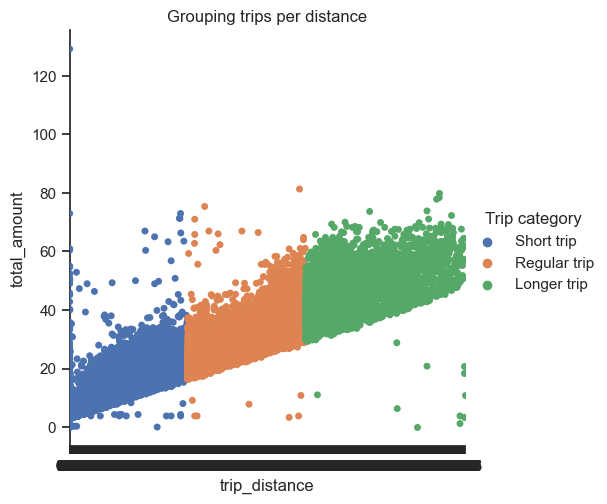

In [73]:
# Creating a categorical plot for the new variable created above

sns.set(style="ticks")
g = sns.catplot(x="trip_distance", y="total_amount", hue="Trip category", data=sub).set(title = 'Grouping trips per distance')

[Text(0.5, 1.0, 'Fare amount histogram')]

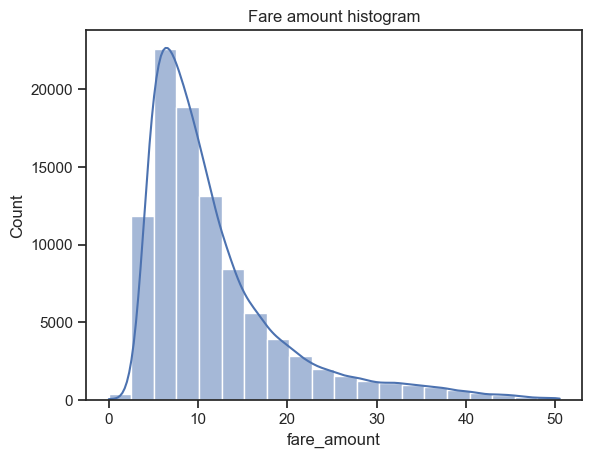

In [74]:
# Making a histogram => fare amount 
sns.histplot(sub['fare_amount'], bins = 20, kde = True).set(title = 'Fare amount histogram')

In [56]:
# Creating a new variable to categorise trips by length
sub.loc[sub['fare_amount'] < 10, 'Fare category'] = 'Cheap trip'

C:\Users\Paola\AppData\Local\Temp\ipykernel_15888\3763230222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['fare_amount'] < 10, 'Fare category'] = 'Cheap trip'


In [58]:
sub.loc[(sub['fare_amount'] >= 10) & (sub['fare_amount'] <20), 'Fare category'] = 'Regular trip'

In [59]:
sub.loc[sub['fare_amount'] >= 20, 'Fare category'] = 'Expensive trip'

In [65]:
# Checking value counts for the new variable
sub['Fare category'].value_counts(dropna = False)

Cheap trip        50349
Regular trip      33757
Expensive trip    13000
Name: Fare category, dtype: int64

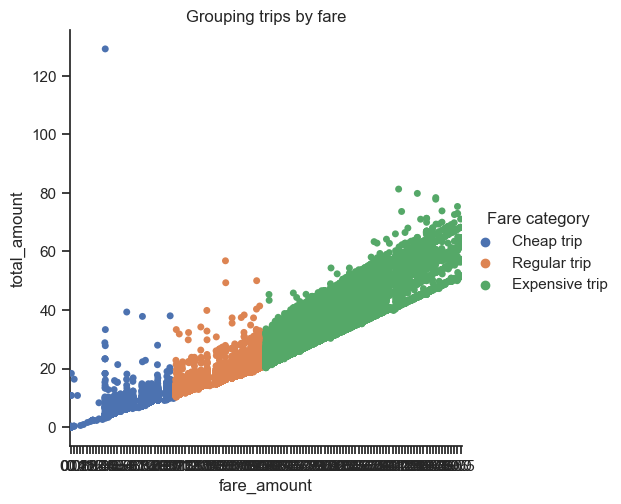

In [68]:
# Creating a categorical plot for the fare variable created above

sns.set(style="ticks")
g = sns.catplot(x="fare_amount", y="total_amount", hue="Fare category", data=sub).set(title = 'Grouping trips by fare')

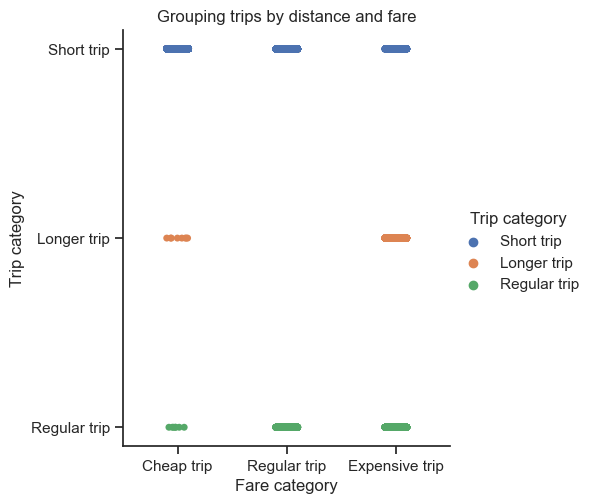

In [71]:
# Creating a categorical plot for the two new variables to draw conclusions.

sns.set(style="ticks")
g = sns.catplot(x="Fare category", y="Trip category", hue="Trip category", data=sub).set(title = 'Grouping trips by distance and fare')

While the first two cat plots also show a trend line similar to the scatterplots made earlier, this one is quite surprising:
It shows that there are cheaper trips which are considerably long, and longer trips that ended up being cheaper than they should have been.

The correlation - on its own - may seem misleading, and not the only factor that influences the cost of the trip (which - until now - was assumed to be just the length of the trip).

In [75]:
# Answering some of the initial questions
sub1.describe()

,trip_distance,payment_type,fare_amount,extra,tip_amount,total_amount
count,97106.000000,97106.000000,97106.000000,97106.000000,97106.000000,97106.000000
mean,2.604347,1.340401,11.951998,0.103994,1.682587,14.767821
std,2.708974,0.482184,8.001969,0.203144,2.089633,10.026839
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.980000,1.000000,6.500000,0.000000,0.000000,8.300000
50%,1.620000,1.000000,9.500000,0.000000,1.260000,11.760000
75%,2.970000,2.000000,14.500000,0.000000,2.360000,17.290000
max,28.500000,4.000000,50.500000,1.000000,125.880000,129.180000


# Answering clarifying questions:

NOTE: trips costing more than $50 have been excluded, to avoid unnecessary outliers and not skew the data unnecesarily.

1-	How much is the average length trip on Uber? The average trip length on Uber is between 2.5 and 3 miles long.

2-	How much is the average spent on Uber trips? The average spent on a trip in Uber is around $14 dollars.


# Further questions to investigate (besides those on initial report):

1) Does payment type (cash or card) result on a discount from the driver, which influences the total amount to pay?

2) Does a dispute between passenger/s and driver result on a cheaper fare, in order to settle the argument quickly?


# Possible hypothesis:
Null hypothesis: Trips during unsociable hours or on weekends do not cost more expensive than during social hours/weekdays.

Alternative hypothesis: Trips during unsociable hours or weekends cost more than during social hours/weekdays.

NOTE: this is a one-way test.